In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, DotProduct, ExpSineSquared

In [2]:
#Define constants and deltas
defaultval = {'H0': 67.26, 'ns': 0.9652, 'ombh2': 0.02222, 'omch2': 0.1199, 'sigma_8': 0.83, 'w0': -1.0}
delta = {'H0': 3.36, 'ns': 0.048, 'ombh2': 0.001, 'omch2': 0.006, 'sigma_8': 0.0415, 'w0': 0.05}
parlist = ['H0','ns','ombh2', 'omch2','sigma_8','w0']

In [3]:
#polynomials
def p1(x):
    return np.power(x,2) + 5*x - 3

def p2(x):
    return np.power(x,5) + 7*np.power(x,2)

def p3(x):
    return np.cos(x)

def p4(x):
    return np.power(np.sin(x), 2)

def p5(x):
    return np.power(x,7) + np.power(x,6) + np.power(x,5)

def p6(x):
    return np.power(x,7) + np.power(x,4) + np.power(x,3) + np.power(x,2) + x

def f(x1, x2, x3, x4, x5, x6):
    return p1(x1) + p2(x2) + p3(x3) + p4(x4) + p5(x5) + p6(x6)

In [4]:
#Value of each polynomial at the respective default parameter values
print(p1(defaultval[parlist[0]]))
print(p2(defaultval[parlist[1]]))
print(p3(defaultval[parlist[2]]))
print(p4(defaultval[parlist[3]]))
print(p5(defaultval[parlist[4]]))
print(p6(defaultval[parlist[5]]))

4857.207600000001
7.358973520131105
0.9997531459568217
0.014307252024880672
0.9922049475652698
-1.0


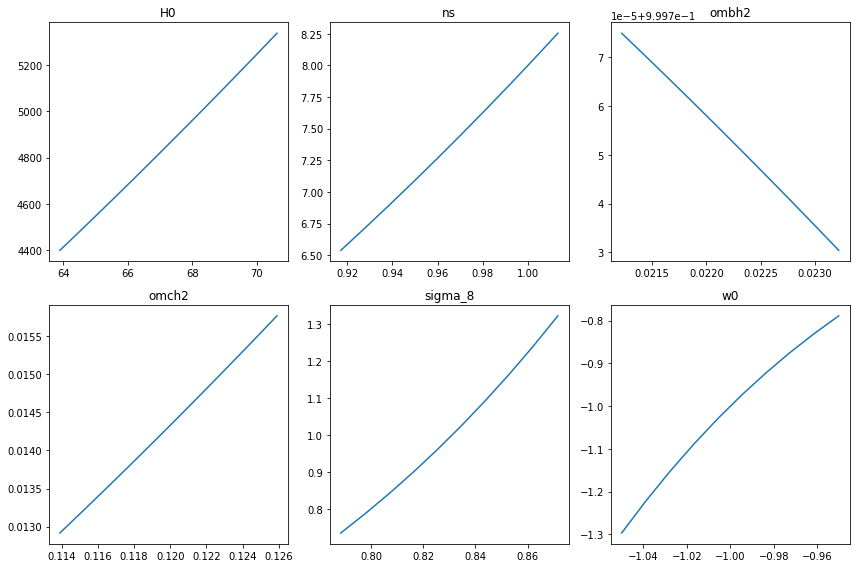

In [5]:
#Plot value of respective polynomials between default parameter value +- 5%
#They are all monotonic within the given limit
def x_to_plot(param):
    return np.linspace(defaultval[param] - delta[param], defaultval[param] + delta[param], 10)
plt.figure(figsize=(12,8))
plt.subplot(231)
x = x_to_plot(parlist[0])
plt.plot(x, p1(x))
plt.title(parlist[0])

plt.subplot(232)
x = x_to_plot(parlist[1])
plt.plot(x, p2(x))
plt.title(parlist[1])

plt.subplot(233)
x = x_to_plot(parlist[2])
plt.plot(x, p3(x))
plt.title(parlist[2])

plt.subplot(234)
x = x_to_plot(parlist[3])
plt.plot(x, p4(x))
plt.title(parlist[3])

plt.subplot(235)
x = x_to_plot(parlist[4])
plt.plot(x, p5(x))
plt.title(parlist[4])

plt.subplot(236)
x = x_to_plot(parlist[5])
plt.plot(x, p6(x))
plt.title(parlist[5])
plt.tight_layout()

In [6]:
#derivatives
def dp1(x):
    return 2*x + 5

def dp2(x):
    return 5*np.power(x,4) + 14*x

def dp3(x):
    return -np.sin(x)

def dp4(x):
    return np.sin(2*x)

def dp5(x):
    return 7*np.power(x,6) + 6*np.power(x,5) + 5*np.power(x,4) 

def dp6(x):
    return 5*np.power(x,4) + 4*np.power(x,3) + 3*np.power(x,2) + 2*x + 1

# Training

In [16]:
parfile = 'WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist'
x = np.loadtxt(parfile)
x = np.delete(x, [0,2,3,4,8], axis=1)
y = []
for simnum in range(40):
    y.append(f(x[simnum,0], x[simnum,1], x[simnum,2], x[simnum,3], x[simnum,4], x[simnum,5]))
y = np.array(y)

# kernel = RBF()
# gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(x, y)
# print("Score =", gpr.score(x, y))
param_grid = {"kernel": [RBF(l) for l in np.linspace(0.1, 10, 100)]}
gpr = GridSearchCV(GaussianProcessRegressor(random_state=0), param_grid=param_grid)
gpr.fit(x, y)

/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

GridSearchCV(estimator=GaussianProcessRegressor(random_state=0),
             param_grid={'kernel': [RBF(length_scale=0.1),
                                    RBF(length_scale=0.2),
                                    RBF(length_scale=0.3),
                                    RBF(length_scale=0.4),
                                    RBF(length_scale=0.5),
                                    RBF(length_scale=0.6),
                                    RBF(length_scale=0.7),
                                    RBF(length_scale=0.8),
                                    RBF(length_scale=0.9), RBF(length_scale=1),
                                    RBF(length_scale=1.1),
                                    RBF(length_scale=1.2),
                                    RB...
                                    RBF(length_scale=1.5),
                                    RBF(length_scale=1.6),
                                    RBF(length_scale=1.7),
                                    RBF(length

In [17]:
print(gpr.score(x, y)) #Test the same dataset
print(gpr.best_params_)

0.9999999999927879
{'kernel': RBF(length_scale=0.3)}


In [8]:
#Do NOT RUN THIS unless specifically needed
#Try scaling the feature matrix (Use the same transformation 'scaler' while predicting)
#This gave a score of 0.8851259237863922. which is worse than unscaled version

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
X_scaled = scaler.transform(x)
# kernel = RBF()
# gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_scaled, y)
param_grid = {"kernel": [RBF(l) for l in np.linspace(0.1, 10, 100)]}
gpr = GridSearchCV(GaussianProcessRegressor(random_state=0), param_grid=param_grid)
gpr.fit(X_scaled, y)

/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/dl/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

GridSearchCV(estimator=GaussianProcessRegressor(random_state=0),
             param_grid={'kernel': [RBF(length_scale=0.1),
                                    RBF(length_scale=0.2),
                                    RBF(length_scale=0.3),
                                    RBF(length_scale=0.4),
                                    RBF(length_scale=0.5),
                                    RBF(length_scale=0.6),
                                    RBF(length_scale=0.7),
                                    RBF(length_scale=0.8),
                                    RBF(length_scale=0.9), RBF(length_scale=1),
                                    RBF(length_scale=1.1),
                                    RBF(length_scale=1.2),
                                    RB...
                                    RBF(length_scale=1.5),
                                    RBF(length_scale=1.6),
                                    RBF(length_scale=1.7),
                                    RBF(length

# Mock data

In [18]:
res_sims = {}
res_sims['default'] = {parlist[0]: defaultval[parlist[0]], parlist[1]: defaultval[parlist[1]], 
                       parlist[2]: defaultval[parlist[2]], parlist[3]: defaultval[parlist[3]], 
                       parlist[4]: defaultval[parlist[4]], parlist[5]: defaultval[parlist[5]], 
                       'f(x)': np.array([0, f(defaultval[parlist[0]], defaultval[parlist[1]], 
                        defaultval[parlist[2]], defaultval[parlist[3]], defaultval[parlist[4]], 
                        defaultval[parlist[5]])])}

single_vary_simnames = ["default-H0-pos","default-H0-neg","default-ns-pos","default-ns-neg","default-ombh2-pos",
                        "default-ombh2-neg","default-omch2-pos","default-omch2-neg","default-sigma_8-pos",
                        "default-sigma_8-neg","default-w0-pos","default-w0-neg"]

single_vary_grid = [] #rows: simname, column: parameter value  
for simname in single_vary_simnames:
    res_sims[simname] = {}
    cur_param_vector = []
    sim, par, sign = simname.split('-')
    for par2 in parlist:
        if par != par2:
            res_sims[simname][par2] = defaultval[par2]
            cur_param_vector.append(defaultval[par2])
        else:
            if sign == 'pos':
                res_sims[simname][par] = defaultval[par] + delta[par]
                cur_param_vector.append(defaultval[par] + delta[par])
            elif sign == 'neg':
                res_sims[simname][par] = defaultval[par] - delta[par]
                cur_param_vector.append(defaultval[par] - delta[par])
    single_vary_grid.append(cur_param_vector)

single_vary_grid = np.array(single_vary_grid)

In [19]:
x_test = np.copy(single_vary_grid)
y_test = []
for i in range(single_vary_grid.shape[0]):
    y_test.append(f(single_vary_grid[i,0], single_vary_grid[i,1], single_vary_grid[i,2], single_vary_grid[i,3],
                   single_vary_grid[i,4], single_vary_grid[i,5]))
print("Score for unseen dataset=",gpr.score(x_test, y_test))

Score for unseen dataset= 0.9999994570160305


In [20]:
#Generate observations from the +- 5% grid using GPR
predicted_f = gpr.predict(single_vary_grid)
for simnum, simname in enumerate(single_vary_simnames):
    res_sims[simname]['f(x)'] = np.array([0, predicted_f[simnum]])

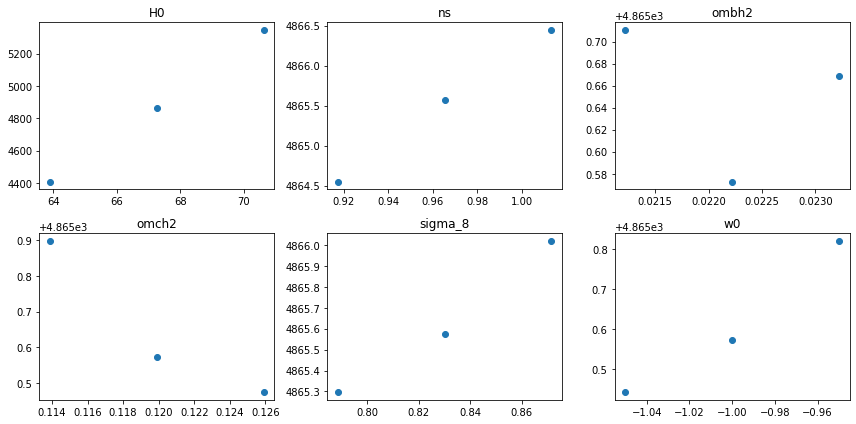

In [21]:
#Plot the predicted value of 'f' as function of each parameter.
#This is not monotonic for 'ombh2'
def x_to_plot(param):
    return np.linspace(defaultval[param] - delta[param], defaultval[param] + delta[param], 10)
plt.figure(figsize=(12,6))
plt.subplot(231)
param = parlist[0]
plt.scatter([res_sims['default-' + param + '-pos'][param], res_sims['default'][param], 
            res_sims['default-' + param + '-neg'][param]], [res_sims['default-' + param + '-pos']['f(x)'][1], 
            res_sims['default']['f(x)'][1], res_sims['default-' + param + '-neg']['f(x)'][1]])
plt.title(parlist[0])

plt.subplot(232)
param = parlist[1]
plt.scatter([res_sims['default-' + param + '-pos'][param], res_sims['default'][param], 
             res_sims['default-' + param + '-neg'][param]], [res_sims['default-' + param + '-pos']['f(x)'][1], 
            res_sims['default']['f(x)'][1], res_sims['default-' + param + '-neg']['f(x)'][1]])
plt.title(parlist[1])

plt.subplot(233)
param = parlist[2]
plt.scatter([res_sims['default-' + param + '-pos'][param], res_sims['default'][param], 
             res_sims['default-' + param + '-neg'][param]], [res_sims['default-' + param + '-pos']['f(x)'][1], 
            res_sims['default']['f(x)'][1], res_sims['default-' + param + '-neg']['f(x)'][1]])
plt.title(parlist[2])

plt.subplot(234)
param = parlist[3]
plt.scatter([res_sims['default-' + param + '-pos'][param], res_sims['default'][param], 
             res_sims['default-' + param + '-neg'][param]], [res_sims['default-' + param + '-pos']['f(x)'][1], 
            res_sims['default']['f(x)'][1], res_sims['default-' + param + '-neg']['f(x)'][1]])
plt.title(parlist[3])

plt.subplot(235)
param = parlist[4]
plt.scatter([res_sims['default-' + param + '-pos'][param], res_sims['default'][param], 
             res_sims['default-' + param + '-neg'][param]], [res_sims['default-' + param + '-pos']['f(x)'][1], 
            res_sims['default']['f(x)'][1], res_sims['default-' + param + '-neg']['f(x)'][1]])
plt.title(parlist[4])

plt.subplot(236)
param = parlist[5]
plt.scatter([res_sims['default-' + param + '-pos'][param], res_sims['default'][param], 
             res_sims['default-' + param + '-neg'][param]], [res_sims['default-' + param + '-pos']['f(x)'][1], 
            res_sims['default']['f(x)'][1], res_sims['default-' + param + '-neg']['f(x)'][1]])
plt.title(parlist[5])
plt.tight_layout()

In [22]:
#The difference between f('pos') and f('neg') is very small for 'ombh2'/'omch2'/'w0'
for name, val in res_sims.items():
  print('%-22s%s'%(name, val['f(x)'][1]))

default               4865.572838865679
default-H0-pos        5345.647361785173
default-H0-neg        4407.979323816486
default-ns-pos        4866.445506924763
default-ns-neg        4864.549847058952
default-ombh2-pos     4865.668957030401
default-ombh2-neg     4865.7104596775025
default-omch2-pos     4865.474605387077
default-omch2-neg     4865.898752460256
default-sigma_8-pos   4866.020989473909
default-sigma_8-neg   4865.296321706846
default-w0-pos        4865.822223493829
default-w0-neg        4865.441666472703


# Derivatives

In [23]:
#This is the same function that is used to calculate derivatives by linear regression in the main analysis
def calculate_HOD_derivatives_linear(res_sims, sim, paramlist, statlist):
    derivative_matrix = []
    
    for param in paramlist:
        statdict = {}
        simkeys = [sim + '-' + param + '-' + 'pos', sim, sim + '-' + param + '-' + 'neg']
        paramvec = np.array([res_sims[simkeys[0]][param], res_sims[simkeys[1]][param], 
                    res_sims[simkeys[2]][param]])
        
        #Make statdict with rows having statistic values for particular simkey and columns being scales
        for stat in statlist:
            statdict[stat] = np.array([res_sims[simkeys[0]][stat][1]])
            for simkey in simkeys[1:]:
                statdict[stat] = np.vstack((statdict[stat], np.array([res_sims[simkey][stat][1]])))
                
        #Calculate derivative for each statistic
        cur_der_vector = np.polyfit(paramvec, np.array(statdict[statlist[0]]), 1)[0,:]
        for stat in statlist[1:]:
            cur_der_vector = np.append(cur_der_vector, np.polyfit(paramvec, np.array(statdict[stat]), 1)[0])
        derivative_matrix.append(cur_der_vector)
        
    return np.array(derivative_matrix).T

In [24]:
linear_derivative = calculate_HOD_derivatives_linear(res_sims, 'default', parlist, ['f(x)'])
real_derivative = [dp1(defaultval[parlist[0]]), dp2(defaultval[parlist[1]]), dp3(defaultval[parlist[2]]), 
                   dp4(defaultval[parlist[3]]), dp5(defaultval[parlist[4]]), dp6(defaultval[parlist[5]])]

print("Linear:\t", linear_derivative[0])
print("Real:\t", real_derivative)

Linear:	 [139.53393422  19.74645694 -20.75132355 -35.34558943   8.73093695
   3.80557021]
Real:	 [139.52, 17.852295649249406, -0.022218171604295796, 0.2375083540794068, 7.024923049382998, 3.0]
